Cell 1 — Imports & Setup

In [1]:
import re
import matplotlib.pyplot as plt


Cell 2 — Load Book Function

In [2]:
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]
    
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()


Cell 3 — Load Both Books

In [3]:
war_text = load_book('../data/The Project Gutenberg eBook of War and Peace, by Leo Tolstoy.txt')
anna_text = load_book('../data/The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy.txt')

print(f"War and Peace loaded: {len(war_text):,} characters")
print(f"Anna Karenina loaded: {len(anna_text):,} characters")


War and Peace loaded: 3,203,378 characters
Anna Karenina loaded: 1,963,419 characters


Cell 4 — Syllable Counter

In [4]:
def count_syllables(word):
    """Simple syllable counter for English words"""
    word = word.lower()
    word = re.sub(r'[^a-z]', '', word)

    if not word:
        return 1
    
    syllables = len(re.findall(r'[aeiouy]+', word))
    
    if word.endswith('e') and syllables > 1:
        syllables -= 1
    
    return max(1, syllables)


Cell 5 — Readability Calculation

In [5]:
def calculate_readability(text, book_name):
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s for s in sentences if len(s.split()) > 2]

    words = re.findall(r"[A-Za-z']+", text)
    syllables = sum(count_syllables(w) for w in words)

    num_sentences = len(sentences)
    num_words = len(words)

    flesch_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (syllables / num_words)
    flesch_grade = 0.39 * (num_words / num_sentences) + 11.8 * (syllables / num_words) - 15.59

    print(f"\n📚 {book_name}")
    print("-" * 60)
    print(f"Sentences: {num_sentences:,}")
    print(f"Words: {num_words:,}")
    print(f"Syllables: {syllables:,}")
    print(f"Avg words per sentence: {num_words/num_sentences:.2f}")
    print(f"Avg syllables per word: {syllables/num_words:.2f}")
    print(f"\nFlesch Reading Ease: {flesch_ease:.2f}")
    print(f"Flesch-Kincaid Grade Level: {flesch_grade:.2f}")

    return flesch_ease, flesch_grade


Cell 6 — Run Analysis

In [6]:
wap_ease, wap_grade = calculate_readability(war_text, "War and Peace")
anna_ease, anna_grade = calculate_readability(anna_text, "Anna Karenina")


📚 War and Peace
------------------------------------------------------------
Sentences: 26,178
Words: 583,358
Syllables: 821,204
Avg words per sentence: 22.28
Avg syllables per word: 1.41

Flesch Reading Ease: 65.12
Flesch-Kincaid Grade Level: 9.71

📚 Anna Karenina
------------------------------------------------------------
Sentences: 16,669
Words: 358,368
Syllables: 503,654
Avg words per sentence: 21.50
Avg syllables per word: 1.41

Flesch Reading Ease: 66.12
Flesch-Kincaid Grade Level: 9.38


Cell 7 — Visualization

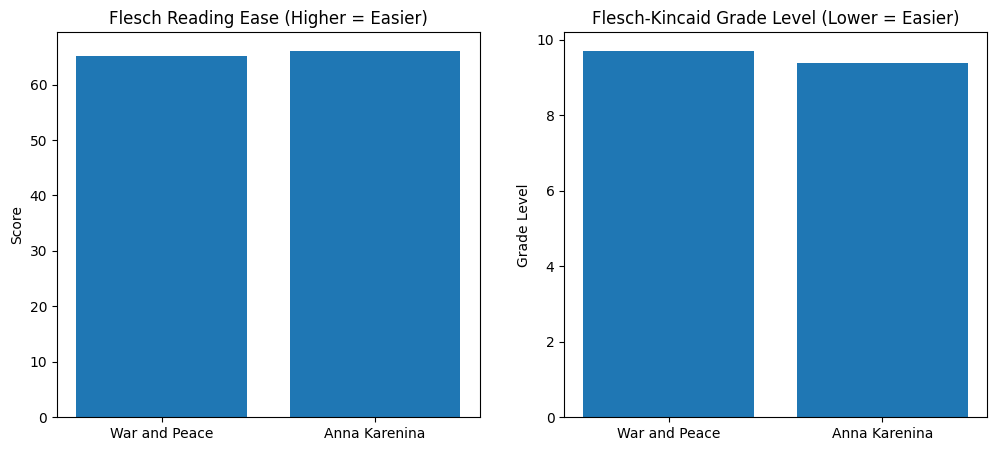

In [7]:
books = ["War and Peace", "Anna Karenina"]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Reading Ease
ax[0].bar(books, [wap_ease, anna_ease])
ax[0].set_title("Flesch Reading Ease (Higher = Easier)")
ax[0].set_ylabel("Score")

# Grade Level
ax[1].bar(books, [wap_grade, anna_grade])
ax[1].set_title("Flesch-Kincaid Grade Level (Lower = Easier)")
ax[1].set_ylabel("Grade Level")

plt.show()


Cell 8 — Summary

In [8]:
print("\n================ SUMMARY ================")

if wap_ease > anna_ease:
    print("➡️ War and Peace appears slightly easier to read.")
else:
    print("➡️ Anna Karenina appears slightly easier to read.")

print("Both books require strong reading skills due to long sentences and advanced vocabulary.")



================ SUMMARY ================
➡️ Anna Karenina appears slightly easier to read.
Both books require strong reading skills due to long sentences and advanced vocabulary.
